In [74]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, BatchNormalization
from keras.callbacks import TensorBoard
from keras.callbacks import ModelCheckpoint
from keras.optimizers import RMSprop
print("hello")

hello


In [75]:
x = pd.read_csv('ip.csv')

y = pd.read_csv('op.csv')
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
print(scaler_x.fit(x))
xscale=scaler_x.transform(x)
print(scaler_y.fit(y))
yscale=scaler_y.transform(y)



MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))


In [76]:
X_train, X_test, y_train, y_test = train_test_split(xscale, yscale)
# X_train, X_test, y_train, y_test = train_test_split(x, y)

In [77]:
# Defines "deep" model and its structure
model = Sequential()
model.add(Dense(3, input_dim=3,kernel_initializer='normal', activation='tanh'))
model.add(Dense(5, activation='tanh'))
model.add(Dense(3, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
# o=BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None)
# model.add(o)
model.summary()



Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 3)                 12        
_________________________________________________________________
dense_42 (Dense)             (None, 5)                 20        
_________________________________________________________________
dense_43 (Dense)             (None, 3)                 18        
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 4         
Total params: 54
Trainable params: 54
Non-trainable params: 0
_________________________________________________________________


In [79]:

opt = RMSprop(lr=0.001, rho=0.9)

# Compile model
model.compile(loss='mean_squared_error',optimizer=opt, metrics=['accuracy'])

In [80]:
history = model.fit(X_train, y_train, epochs=1000, verbose=1, validation_split=0.2)

Train on 368 samples, validate on 93 samples
Epoch 1/1000
368/368 [==============================] - 1s 2ms/step - loss: 0.1489 - accuracy: 0.0000e+00 - val_loss: 0.1435 - val_accuracy: 0.0000e+00
Epoch 2/1000
368/368 [==============================] - 0s 86us/step - loss: 0.1379 - accuracy: 0.0000e+00 - val_loss: 0.1341 - val_accuracy: 0.0000e+00
Epoch 3/1000
368/368 [==============================] - 0s 104us/step - loss: 0.1290 - accuracy: 0.0000e+00 - val_loss: 0.1253 - val_accuracy: 0.0000e+00
Epoch 4/1000
368/368 [==============================] - 0s 98us/step - loss: 0.1205 - accuracy: 0.0000e+00 - val_loss: 0.1168 - val_accuracy: 0.0000e+00
Epoch 5/1000
368/368 [==============================] - 0s 113us/step - loss: 0.1122 - accuracy: 0.0000e+00 - val_loss: 0.1085 - val_accuracy: 0.0000e+00
Epoch 6/1000
368/368 [==============================] - 0s 131us/step - loss: 0.1042 - accuracy: 0.0000e+00 - val_loss: 0.1005 - val_accuracy: 0.0000e+00
Epoch 7/1000
368/368 [=============

Epoch 54/1000
368/368 [==============================] - 0s 88us/step - loss: 0.0040 - accuracy: 0.0000e+00 - val_loss: 9.9378e-04 - val_accuracy: 0.0000e+00
Epoch 55/1000
368/368 [==============================] - 0s 81us/step - loss: 0.0039 - accuracy: 0.0000e+00 - val_loss: 9.2567e-04 - val_accuracy: 0.0000e+00
Epoch 56/1000
368/368 [==============================] - 0s 84us/step - loss: 0.0039 - accuracy: 0.0000e+00 - val_loss: 8.6474e-04 - val_accuracy: 0.0000e+00
Epoch 57/1000
368/368 [==============================] - 0s 89us/step - loss: 0.0038 - accuracy: 0.0000e+00 - val_loss: 8.1427e-04 - val_accuracy: 0.0000e+00
Epoch 58/1000
368/368 [==============================] - 0s 79us/step - loss: 0.0038 - accuracy: 0.0000e+00 - val_loss: 7.7244e-04 - val_accuracy: 0.0000e+00
Epoch 59/1000
368/368 [==============================] - 0s 71us/step - loss: 0.0038 - accuracy: 0.0000e+00 - val_loss: 7.3417e-04 - val_accuracy: 0.0000e+00
Epoch 60/1000
368/368 [=============================

Epoch 106/1000
368/368 [==============================] - 0s 75us/step - loss: 0.0037 - accuracy: 0.0000e+00 - val_loss: 5.4338e-04 - val_accuracy: 0.0000e+00
Epoch 107/1000
368/368 [==============================] - 0s 80us/step - loss: 0.0037 - accuracy: 0.0000e+00 - val_loss: 5.4332e-04 - val_accuracy: 0.0000e+00
Epoch 108/1000
368/368 [==============================] - 0s 81us/step - loss: 0.0037 - accuracy: 0.0000e+00 - val_loss: 5.4434e-04 - val_accuracy: 0.0000e+00
Epoch 109/1000
368/368 [==============================] - 0s 83us/step - loss: 0.0037 - accuracy: 0.0000e+00 - val_loss: 5.4617e-04 - val_accuracy: 0.0000e+00
Epoch 110/1000
368/368 [==============================] - 0s 99us/step - loss: 0.0037 - accuracy: 0.0000e+00 - val_loss: 5.4581e-04 - val_accuracy: 0.0000e+00
Epoch 111/1000
368/368 [==============================] - 0s 72us/step - loss: 0.0037 - accuracy: 0.0000e+00 - val_loss: 5.4478e-04 - val_accuracy: 0.0000e+00
Epoch 112/1000
368/368 [======================

368/368 [==============================] - 0s 123us/step - loss: 0.0037 - accuracy: 0.0000e+00 - val_loss: 5.4539e-04 - val_accuracy: 0.0000e+00
Epoch 158/1000
368/368 [==============================] - 0s 106us/step - loss: 0.0037 - accuracy: 0.0000e+00 - val_loss: 5.4510e-04 - val_accuracy: 0.0000e+00
Epoch 159/1000
368/368 [==============================] - 0s 104us/step - loss: 0.0037 - accuracy: 0.0000e+00 - val_loss: 5.4448e-04 - val_accuracy: 0.0000e+00
Epoch 160/1000
368/368 [==============================] - 0s 95us/step - loss: 0.0037 - accuracy: 0.0000e+00 - val_loss: 5.4604e-04 - val_accuracy: 0.0000e+00
Epoch 161/1000
368/368 [==============================] - 0s 83us/step - loss: 0.0037 - accuracy: 0.0000e+00 - val_loss: 5.4490e-04 - val_accuracy: 0.0000e+00
Epoch 162/1000
368/368 [==============================] - 0s 105us/step - loss: 0.0037 - accuracy: 0.0000e+00 - val_loss: 5.4468e-04 - val_accuracy: 0.0000e+00
Epoch 163/1000
368/368 [==============================] -

368/368 [==============================] - 0s 93us/step - loss: 0.0037 - accuracy: 0.0000e+00 - val_loss: 5.4820e-04 - val_accuracy: 0.0000e+00
Epoch 209/1000
368/368 [==============================] - 0s 97us/step - loss: 0.0037 - accuracy: 0.0000e+00 - val_loss: 5.4927e-04 - val_accuracy: 0.0000e+00
Epoch 210/1000
368/368 [==============================] - 0s 104us/step - loss: 0.0037 - accuracy: 0.0000e+00 - val_loss: 5.4978e-04 - val_accuracy: 0.0000e+00
Epoch 211/1000
368/368 [==============================] - 0s 88us/step - loss: 0.0037 - accuracy: 0.0000e+00 - val_loss: 5.4922e-04 - val_accuracy: 0.0000e+00
Epoch 212/1000
368/368 [==============================] - 0s 84us/step - loss: 0.0037 - accuracy: 0.0000e+00 - val_loss: 5.5174e-04 - val_accuracy: 0.0000e+00
Epoch 213/1000
368/368 [==============================] - 0s 84us/step - loss: 0.0037 - accuracy: 0.0000e+00 - val_loss: 5.5116e-04 - val_accuracy: 0.0000e+00
Epoch 214/1000
368/368 [==============================] - 0s

368/368 [==============================] - 0s 127us/step - loss: 0.0036 - accuracy: 0.0000e+00 - val_loss: 5.4862e-04 - val_accuracy: 0.0000e+00
Epoch 260/1000
368/368 [==============================] - 0s 102us/step - loss: 0.0036 - accuracy: 0.0000e+00 - val_loss: 5.4903e-04 - val_accuracy: 0.0000e+00
Epoch 261/1000
368/368 [==============================] - 0s 101us/step - loss: 0.0036 - accuracy: 0.0000e+00 - val_loss: 5.4885e-04 - val_accuracy: 0.0000e+00
Epoch 262/1000
368/368 [==============================] - 0s 89us/step - loss: 0.0036 - accuracy: 0.0000e+00 - val_loss: 5.4832e-04 - val_accuracy: 0.0000e+00
Epoch 263/1000
368/368 [==============================] - 0s 79us/step - loss: 0.0036 - accuracy: 0.0000e+00 - val_loss: 5.4964e-04 - val_accuracy: 0.0000e+00
Epoch 264/1000
368/368 [==============================] - 0s 88us/step - loss: 0.0036 - accuracy: 0.0000e+00 - val_loss: 5.5211e-04 - val_accuracy: 0.0000e+00
Epoch 265/1000
368/368 [==============================] - 

368/368 [==============================] - 0s 108us/step - loss: 0.0035 - accuracy: 0.0000e+00 - val_loss: 5.5530e-04 - val_accuracy: 0.0000e+00
Epoch 311/1000
368/368 [==============================] - 0s 106us/step - loss: 0.0035 - accuracy: 0.0000e+00 - val_loss: 5.5567e-04 - val_accuracy: 0.0000e+00
Epoch 312/1000
368/368 [==============================] - 0s 105us/step - loss: 0.0035 - accuracy: 0.0000e+00 - val_loss: 5.5528e-04 - val_accuracy: 0.0000e+00
Epoch 313/1000
368/368 [==============================] - 0s 85us/step - loss: 0.0035 - accuracy: 0.0000e+00 - val_loss: 5.5630e-04 - val_accuracy: 0.0000e+00
Epoch 314/1000
368/368 [==============================] - 0s 92us/step - loss: 0.0035 - accuracy: 0.0000e+00 - val_loss: 5.5732e-04 - val_accuracy: 0.0000e+00
Epoch 315/1000
368/368 [==============================] - 0s 93us/step - loss: 0.0034 - accuracy: 0.0000e+00 - val_loss: 5.5750e-04 - val_accuracy: 0.0000e+00
Epoch 316/1000
368/368 [==============================] - 

368/368 [==============================] - 0s 132us/step - loss: 0.0031 - accuracy: 0.0000e+00 - val_loss: 6.1899e-04 - val_accuracy: 0.0000e+00
Epoch 362/1000
368/368 [==============================] - 0s 110us/step - loss: 0.0031 - accuracy: 0.0000e+00 - val_loss: 6.1958e-04 - val_accuracy: 0.0000e+00
Epoch 363/1000
368/368 [==============================] - 0s 97us/step - loss: 0.0031 - accuracy: 0.0000e+00 - val_loss: 6.1789e-04 - val_accuracy: 0.0000e+00
Epoch 364/1000
368/368 [==============================] - 0s 120us/step - loss: 0.0031 - accuracy: 0.0000e+00 - val_loss: 6.1894e-04 - val_accuracy: 0.0000e+00
Epoch 365/1000
368/368 [==============================] - 0s 100us/step - loss: 0.0031 - accuracy: 0.0000e+00 - val_loss: 6.2080e-04 - val_accuracy: 0.0000e+00
Epoch 366/1000
368/368 [==============================] - 0s 89us/step - loss: 0.0031 - accuracy: 0.0000e+00 - val_loss: 6.2098e-04 - val_accuracy: 0.0000e+00
Epoch 367/1000
368/368 [==============================] -

368/368 [==============================] - 0s 98us/step - loss: 0.0028 - accuracy: 0.0000e+00 - val_loss: 6.1472e-04 - val_accuracy: 0.0000e+00
Epoch 413/1000
368/368 [==============================] - 0s 124us/step - loss: 0.0028 - accuracy: 0.0000e+00 - val_loss: 6.1534e-04 - val_accuracy: 0.0000e+00
Epoch 414/1000
368/368 [==============================] - 0s 71us/step - loss: 0.0028 - accuracy: 0.0000e+00 - val_loss: 6.1652e-04 - val_accuracy: 0.0000e+00
Epoch 415/1000
368/368 [==============================] - 0s 89us/step - loss: 0.0028 - accuracy: 0.0000e+00 - val_loss: 6.1583e-04 - val_accuracy: 0.0000e+00
Epoch 416/1000
368/368 [==============================] - 0s 78us/step - loss: 0.0028 - accuracy: 0.0000e+00 - val_loss: 6.1490e-04 - val_accuracy: 0.0000e+00
Epoch 417/1000
368/368 [==============================] - 0s 99us/step - loss: 0.0028 - accuracy: 0.0000e+00 - val_loss: 6.1439e-04 - val_accuracy: 0.0000e+00
Epoch 418/1000
368/368 [==============================] - 0s

368/368 [==============================] - 0s 116us/step - loss: 0.0026 - accuracy: 0.0000e+00 - val_loss: 5.7845e-04 - val_accuracy: 0.0000e+00
Epoch 464/1000
368/368 [==============================] - 0s 114us/step - loss: 0.0026 - accuracy: 0.0000e+00 - val_loss: 5.7631e-04 - val_accuracy: 0.0000e+00
Epoch 465/1000
368/368 [==============================] - 0s 113us/step - loss: 0.0026 - accuracy: 0.0000e+00 - val_loss: 5.7518e-04 - val_accuracy: 0.0000e+00
Epoch 466/1000
368/368 [==============================] - 0s 111us/step - loss: 0.0026 - accuracy: 0.0000e+00 - val_loss: 5.7534e-04 - val_accuracy: 0.0000e+00
Epoch 467/1000
368/368 [==============================] - 0s 139us/step - loss: 0.0026 - accuracy: 0.0000e+00 - val_loss: 5.7356e-04 - val_accuracy: 0.0000e+00
Epoch 468/1000
368/368 [==============================] - 0s 96us/step - loss: 0.0026 - accuracy: 0.0000e+00 - val_loss: 5.7146e-04 - val_accuracy: 0.0000e+00
Epoch 469/1000
368/368 [==============================] 

368/368 [==============================] - 0s 94us/step - loss: 0.0024 - accuracy: 0.0000e+00 - val_loss: 5.4642e-04 - val_accuracy: 0.0000e+00
Epoch 515/1000
368/368 [==============================] - 0s 110us/step - loss: 0.0024 - accuracy: 0.0000e+00 - val_loss: 5.4849e-04 - val_accuracy: 0.0000e+00
Epoch 516/1000
368/368 [==============================] - 0s 89us/step - loss: 0.0024 - accuracy: 0.0000e+00 - val_loss: 5.4847e-04 - val_accuracy: 0.0000e+00
Epoch 517/1000
368/368 [==============================] - 0s 90us/step - loss: 0.0024 - accuracy: 0.0000e+00 - val_loss: 5.4786e-04 - val_accuracy: 0.0000e+00
Epoch 518/1000
368/368 [==============================] - 0s 70us/step - loss: 0.0024 - accuracy: 0.0000e+00 - val_loss: 5.4626e-04 - val_accuracy: 0.0000e+00
Epoch 519/1000
368/368 [==============================] - 0s 83us/step - loss: 0.0024 - accuracy: 0.0000e+00 - val_loss: 5.4590e-04 - val_accuracy: 0.0000e+00
Epoch 520/1000
368/368 [==============================] - 0s

368/368 [==============================] - 0s 126us/step - loss: 0.0023 - accuracy: 0.0000e+00 - val_loss: 5.3321e-04 - val_accuracy: 0.0000e+00
Epoch 566/1000
368/368 [==============================] - 0s 128us/step - loss: 0.0023 - accuracy: 0.0000e+00 - val_loss: 5.3331e-04 - val_accuracy: 0.0000e+00
Epoch 567/1000
368/368 [==============================] - 0s 115us/step - loss: 0.0023 - accuracy: 0.0000e+00 - val_loss: 5.3267e-04 - val_accuracy: 0.0000e+00
Epoch 568/1000
368/368 [==============================] - 0s 102us/step - loss: 0.0023 - accuracy: 0.0000e+00 - val_loss: 5.3257e-04 - val_accuracy: 0.0000e+00
Epoch 569/1000
368/368 [==============================] - 0s 119us/step - loss: 0.0023 - accuracy: 0.0000e+00 - val_loss: 5.3211e-04 - val_accuracy: 0.0000e+00
Epoch 570/1000
368/368 [==============================] - 0s 123us/step - loss: 0.0023 - accuracy: 0.0000e+00 - val_loss: 5.3079e-04 - val_accuracy: 0.0000e+00
Epoch 571/1000
368/368 [==============================]

368/368 [==============================] - 0s 113us/step - loss: 0.0021 - accuracy: 0.0000e+00 - val_loss: 5.2869e-04 - val_accuracy: 0.0000e+00
Epoch 617/1000
368/368 [==============================] - 0s 134us/step - loss: 0.0021 - accuracy: 0.0000e+00 - val_loss: 5.2864e-04 - val_accuracy: 0.0000e+00
Epoch 618/1000
368/368 [==============================] - 0s 100us/step - loss: 0.0021 - accuracy: 0.0000e+00 - val_loss: 5.2936e-04 - val_accuracy: 0.0000e+00
Epoch 619/1000
368/368 [==============================] - 0s 104us/step - loss: 0.0021 - accuracy: 0.0000e+00 - val_loss: 5.2959e-04 - val_accuracy: 0.0000e+00
Epoch 620/1000
368/368 [==============================] - 0s 152us/step - loss: 0.0021 - accuracy: 0.0000e+00 - val_loss: 5.2931e-04 - val_accuracy: 0.0000e+00
Epoch 621/1000
368/368 [==============================] - 0s 102us/step - loss: 0.0021 - accuracy: 0.0000e+00 - val_loss: 5.2922e-04 - val_accuracy: 0.0000e+00
Epoch 622/1000
368/368 [==============================]

368/368 [==============================] - 0s 88us/step - loss: 0.0020 - accuracy: 0.0000e+00 - val_loss: 5.2732e-04 - val_accuracy: 0.0000e+00
Epoch 668/1000
368/368 [==============================] - 0s 96us/step - loss: 0.0020 - accuracy: 0.0027 - val_loss: 5.2777e-04 - val_accuracy: 0.0000e+00
Epoch 669/1000
368/368 [==============================] - 0s 94us/step - loss: 0.0020 - accuracy: 0.0027 - val_loss: 5.2832e-04 - val_accuracy: 0.0000e+00
Epoch 670/1000
368/368 [==============================] - 0s 92us/step - loss: 0.0020 - accuracy: 0.0027 - val_loss: 5.2817e-04 - val_accuracy: 0.0000e+00
Epoch 671/1000
368/368 [==============================] - 0s 97us/step - loss: 0.0020 - accuracy: 0.0027 - val_loss: 5.2782e-04 - val_accuracy: 0.0000e+00
Epoch 672/1000
368/368 [==============================] - 0s 112us/step - loss: 0.0019 - accuracy: 0.0027 - val_loss: 5.2821e-04 - val_accuracy: 0.0000e+00
Epoch 673/1000
368/368 [==============================] - 0s 81us/step - loss: 0

Epoch 720/1000
368/368 [==============================] - 0s 87us/step - loss: 0.0018 - accuracy: 0.0027 - val_loss: 5.2642e-04 - val_accuracy: 0.0000e+00
Epoch 721/1000
368/368 [==============================] - 0s 84us/step - loss: 0.0018 - accuracy: 0.0027 - val_loss: 5.2563e-04 - val_accuracy: 0.0000e+00
Epoch 722/1000
368/368 [==============================] - 0s 79us/step - loss: 0.0018 - accuracy: 0.0027 - val_loss: 5.2593e-04 - val_accuracy: 0.0000e+00
Epoch 723/1000
368/368 [==============================] - 0s 86us/step - loss: 0.0018 - accuracy: 0.0027 - val_loss: 5.2655e-04 - val_accuracy: 0.0000e+00
Epoch 724/1000
368/368 [==============================] - 0s 84us/step - loss: 0.0018 - accuracy: 0.0027 - val_loss: 5.2584e-04 - val_accuracy: 0.0000e+00
Epoch 725/1000
368/368 [==============================] - 0s 87us/step - loss: 0.0018 - accuracy: 0.0027 - val_loss: 5.2663e-04 - val_accuracy: 0.0000e+00
Epoch 726/1000
368/368 [==============================] - 0s 75us/step

Epoch 773/1000
368/368 [==============================] - 0s 87us/step - loss: 0.0016 - accuracy: 0.0027 - val_loss: 5.2586e-04 - val_accuracy: 0.0000e+00
Epoch 774/1000
368/368 [==============================] - 0s 90us/step - loss: 0.0016 - accuracy: 0.0027 - val_loss: 5.2615e-04 - val_accuracy: 0.0000e+00
Epoch 775/1000
368/368 [==============================] - 0s 95us/step - loss: 0.0016 - accuracy: 0.0027 - val_loss: 5.2661e-04 - val_accuracy: 0.0000e+00
Epoch 776/1000
368/368 [==============================] - 0s 87us/step - loss: 0.0016 - accuracy: 0.0027 - val_loss: 5.2661e-04 - val_accuracy: 0.0000e+00
Epoch 777/1000
368/368 [==============================] - 0s 105us/step - loss: 0.0016 - accuracy: 0.0027 - val_loss: 5.2668e-04 - val_accuracy: 0.0000e+00
Epoch 778/1000
368/368 [==============================] - 0s 94us/step - loss: 0.0016 - accuracy: 0.0027 - val_loss: 5.2638e-04 - val_accuracy: 0.0000e+00
Epoch 779/1000
368/368 [==============================] - 0s 81us/ste

Epoch 826/1000
368/368 [==============================] - 0s 111us/step - loss: 0.0015 - accuracy: 0.0027 - val_loss: 5.2727e-04 - val_accuracy: 0.0000e+00
Epoch 827/1000
368/368 [==============================] - 0s 95us/step - loss: 0.0015 - accuracy: 0.0027 - val_loss: 5.2706e-04 - val_accuracy: 0.0000e+00
Epoch 828/1000
368/368 [==============================] - 0s 115us/step - loss: 0.0014 - accuracy: 0.0027 - val_loss: 5.2619e-04 - val_accuracy: 0.0000e+00
Epoch 829/1000
368/368 [==============================] - 0s 87us/step - loss: 0.0014 - accuracy: 0.0027 - val_loss: 5.2647e-04 - val_accuracy: 0.0000e+00
Epoch 830/1000
368/368 [==============================] - 0s 91us/step - loss: 0.0014 - accuracy: 0.0027 - val_loss: 5.2589e-04 - val_accuracy: 0.0000e+00
Epoch 831/1000
368/368 [==============================] - 0s 93us/step - loss: 0.0014 - accuracy: 0.0027 - val_loss: 5.2627e-04 - val_accuracy: 0.0000e+00
Epoch 832/1000
368/368 [==============================] - 0s 84us/st

368/368 [==============================] - 0s 123us/step - loss: 0.0014 - accuracy: 0.0027 - val_loss: 5.2721e-04 - val_accuracy: 0.0000e+00
Epoch 879/1000
368/368 [==============================] - 0s 93us/step - loss: 0.0014 - accuracy: 0.0027 - val_loss: 5.2844e-04 - val_accuracy: 0.0000e+00
Epoch 880/1000
368/368 [==============================] - 0s 93us/step - loss: 0.0014 - accuracy: 0.0027 - val_loss: 5.2877e-04 - val_accuracy: 0.0000e+00
Epoch 881/1000
368/368 [==============================] - 0s 109us/step - loss: 0.0014 - accuracy: 0.0027 - val_loss: 5.2769e-04 - val_accuracy: 0.0000e+00
Epoch 882/1000
368/368 [==============================] - 0s 106us/step - loss: 0.0014 - accuracy: 0.0027 - val_loss: 5.2777e-04 - val_accuracy: 0.0000e+00
Epoch 883/1000
368/368 [==============================] - 0s 108us/step - loss: 0.0014 - accuracy: 0.0027 - val_loss: 5.2774e-04 - val_accuracy: 0.0000e+00
Epoch 884/1000
368/368 [==============================] - 0s 107us/step - loss: 0

Epoch 931/1000
368/368 [==============================] - 0s 112us/step - loss: 0.0013 - accuracy: 0.0027 - val_loss: 5.2828e-04 - val_accuracy: 0.0000e+00
Epoch 932/1000
368/368 [==============================] - 0s 114us/step - loss: 0.0013 - accuracy: 0.0027 - val_loss: 5.2898e-04 - val_accuracy: 0.0000e+00
Epoch 933/1000
368/368 [==============================] - 0s 91us/step - loss: 0.0013 - accuracy: 0.0027 - val_loss: 5.2949e-04 - val_accuracy: 0.0000e+00
Epoch 934/1000
368/368 [==============================] - 0s 80us/step - loss: 0.0013 - accuracy: 0.0027 - val_loss: 5.2947e-04 - val_accuracy: 0.0000e+00
Epoch 935/1000
368/368 [==============================] - 0s 93us/step - loss: 0.0013 - accuracy: 0.0027 - val_loss: 5.2972e-04 - val_accuracy: 0.0000e+00
Epoch 936/1000
368/368 [==============================] - 0s 89us/step - loss: 0.0013 - accuracy: 0.0027 - val_loss: 5.2932e-04 - val_accuracy: 0.0000e+00
Epoch 937/1000
368/368 [==============================] - 0s 91us/st

368/368 [==============================] - 0s 137us/step - loss: 0.0013 - accuracy: 0.0027 - val_loss: 5.2788e-04 - val_accuracy: 0.0000e+00
Epoch 984/1000
368/368 [==============================] - 0s 109us/step - loss: 0.0013 - accuracy: 0.0027 - val_loss: 5.2712e-04 - val_accuracy: 0.0000e+00
Epoch 985/1000
368/368 [==============================] - 0s 81us/step - loss: 0.0013 - accuracy: 0.0027 - val_loss: 5.2672e-04 - val_accuracy: 0.0000e+00
Epoch 986/1000
368/368 [==============================] - 0s 84us/step - loss: 0.0013 - accuracy: 0.0027 - val_loss: 5.2786e-04 - val_accuracy: 0.0000e+00
Epoch 987/1000
368/368 [==============================] - 0s 71us/step - loss: 0.0013 - accuracy: 0.0027 - val_loss: 5.2823e-04 - val_accuracy: 0.0000e+00
Epoch 988/1000
368/368 [==============================] - 0s 76us/step - loss: 0.0013 - accuracy: 0.0027 - val_loss: 5.2870e-04 - val_accuracy: 0.0000e+00
Epoch 989/1000
368/368 [==============================] - 0s 104us/step - loss: 0.0

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


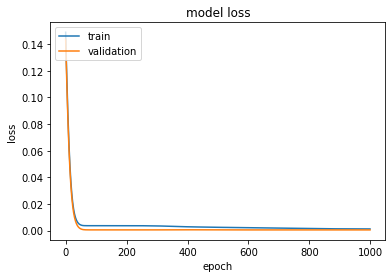

In [81]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [83]:
Xnew = np.array([[500, 10, 2]])
Xnew= scaler_x.transform(Xnew)
ynew= model.predict(Xnew)
#invert normalize
ynew = scaler_y.inverse_transform(ynew) 
Xnew = scaler_x.inverse_transform(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))


X=[500.  10.   2.], Predicted=[1.8667277]


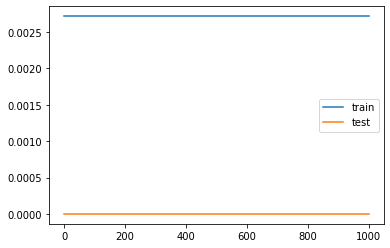

In [62]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()